# Inverse Transform Sampling: Logistic Distribution

Populating the interactive namespace from numpy and matplotlib


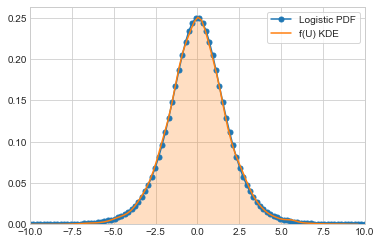

In [1]:
%pylab inline
import numpy as np
import scipy as sp
import seaborn as sns
sns.set_style('whitegrid', {'legend.frameon':True})

def sigmoid_inv(x):
    return -np.log(1 / x - 1)

# Sample f(U)
u = np.random.uniform(0, 1, 10000)
x = sigmoid_inv(u)

# Compute true logistic distribution pdf
z = np.linspace(-10, 10, 100)
y = sp.stats.logistic.pdf(z)

# Plot comparison
plt.plot(z, y, '-o', markersize=5, label='Logistic PDF')
sns.kdeplot(x, shade=True, label='f(U) KDE')
plt.xlim(-10, 10)
plt.savefig('plots/logistic.png', dpi=300, bbox_inches='tight')

# Inverse Transform Sampling: Complicated Distribution

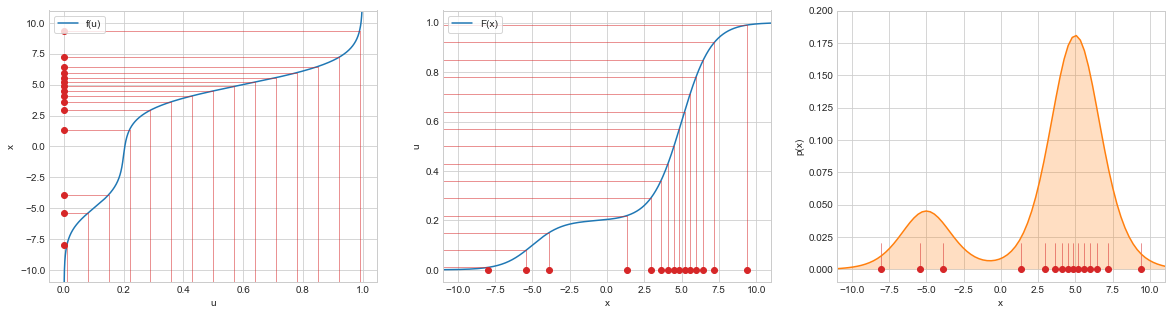

In [2]:
# sns colors
blue, orange, green, red = sns.color_palette()[:4]

def transform(x):
    v = (0.5 * (-np.sqrt(2.72163e13 * x**2 - 1.0885e13 * x + 1.08914e12) - 5.21739e06 * x + 1.04362e06))/(3.51529e04 * x - 3.51529e04)
    return np.log(v)

# Sample
u = np.linspace(.001, .999, 10000)
x = transform(u)

# Sub-sample
u_sub = np.linspace(.01, .99, 15)
x_sub = transform(u_sub)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot U -> X transformation
ax = axes[0]
ax.plot(u, x, c=blue, label='f(u)')
for (a, b) in zip(u_sub, x_sub):
    ax.plot([a, a], [-11, b], c=red, linewidth=0.5, markevery=2)
    ax.plot([0, a], [b, b], '-o', c=red, linewidth=0.5, markevery=2)
ax.set_ylim(-11, 11)    
ax.set_xlabel('u')
ax.set_ylabel('x')
ax.legend(loc='upper left')

# Plot X -> U transformation
ax = axes[1]
ax.plot(x, u, c=blue, label='F(x)')
for (a, b) in zip(x_sub, u_sub):
    ax.plot([a, a], [0, b], '-o', c=red, linewidth=0.5, markevery=2)
    ax.plot([-11, a], [b, b], c=red, linewidth=0.5)
ax.set_xlim(-11, 11)    
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend()

# Plot X KDE
ax = axes[2]
for b in x_sub:
    ax.plot([b, b], [0, 0.02], '-o', c=red, linewidth=0.5, markevery=2)
sns.kdeplot(x, ax=ax, color=orange, shade=True)
ax.set_ylim(-.01, .2)
ax.set_xlim(-11, 11)
ax.set_xlabel('x')
ax.set_ylabel('p(x)')

plt.savefig('plots/bimodal.png', dpi=300, bbox_inches='tight')

# Density Computation

In [5]:
import tensorflow as tf
import tensorbayes as tb

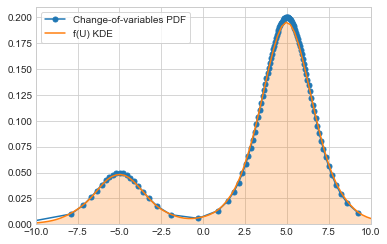

In [6]:
# Convert to tensorflow function
def transform(x):
    v = (0.5 * (-tf.sqrt(2.72163e13 * x**2 - 1.0885e13 * x + 1.08914e12) - 5.21739e06 * x + 1.04362e06))/(3.51529e04 * x - 3.51529e04)
    return tf.log(v)

tf.reset_default_graph()
T = tb.TensorDict(dict(
    sess = tf.Session(config=tb.growth_config()),
    u = tb.nn.placeholder((None,))
))

T.x = transform(T.u)
T.z = 1/ tf.gradients(T.x, T.u)[0]

u = np.random.uniform(0.001, .999, 200000) # Avoid numerical error
u = np.sort(u)
x, z = T.sess.run([T.x, T.z], {T.u: u})

k = 2000
plt.plot(x[0:-1:k], z[0:-1:k], '-o', markersize=5, label='Change-of-variables PDF')
sns.kdeplot(x, shade=True, label='f(U) KDE')
plt.xlim(-10, 10)
plt.savefig('plots/change_of_variables.png', dpi=300, bbox_inches='tight')